# Books Sale Data

**This Data will be about Analyzing Sales, Ratings, Genres and More!**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
df = pd.read_csv(R"C:\Users\Jordan\Desktop\Data Science Folders\First Project\Books_Data_Clean.csv")

So here is the data I'm working with right now, there is a lot of information here so let's inspect it a bit

In [3]:
df.drop('index', axis=1, inplace=True)
df.head()

,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


I took off the index row and took the 5 first data to not overload my notebooks with data and be able to see what I'm looking at

In [4]:
df['language_code'].unique()

array(['en-US', 'eng', nan, 'spa', 'en-GB', 'fre', 'en-CA', 'nl', 'ara'],
      dtype=object)

In [5]:
#I'm kinda wondering what the nan and nl standsfor so I'll try to look into this since I can understand:
#en-US = English US
#spa = spanish
#en-GB = English England
#fre = french
#en-CA = English Canada
#ara = Arabic

In [6]:
df1 = df[df['language_code'] == 'nan']

In [7]:
df2 = df[df['language_code'] == 'nl']

the nan is unresponsive which is a good thing meanwhile nl could standsfor neatherlands

In [8]:
df['genre'].unique()

array(['genre fiction', 'fiction', 'nonfiction', 'children'], dtype=object)

In [9]:
df.isnull().sum()

Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [10]:
df = df.fillna({'Book Name': 'Unknown', 'Publishing Year': '0', 'language_code' : 'Unknown' })

In [11]:
print(df.isnull().sum())

Publishing Year        0
Book Name              0
Author                 0
language_code          0
Author_Rating          0
Book_average_rating    0
Book_ratings_count     0
genre                  0
gross sales            0
publisher revenue      0
sale price             0
sales rank             0
Publisher              0
units sold             0
dtype: int64


###### Lets find the top 10 book that sold the most 

In [12]:
df['AuthorBookName'] = df['Book Name'] + "  from  " + df['Author']
mostsold1 = df.groupby('AuthorBookName')['units sold'].sum().nlargest(10).reset_index()

##### Visualization of my data 

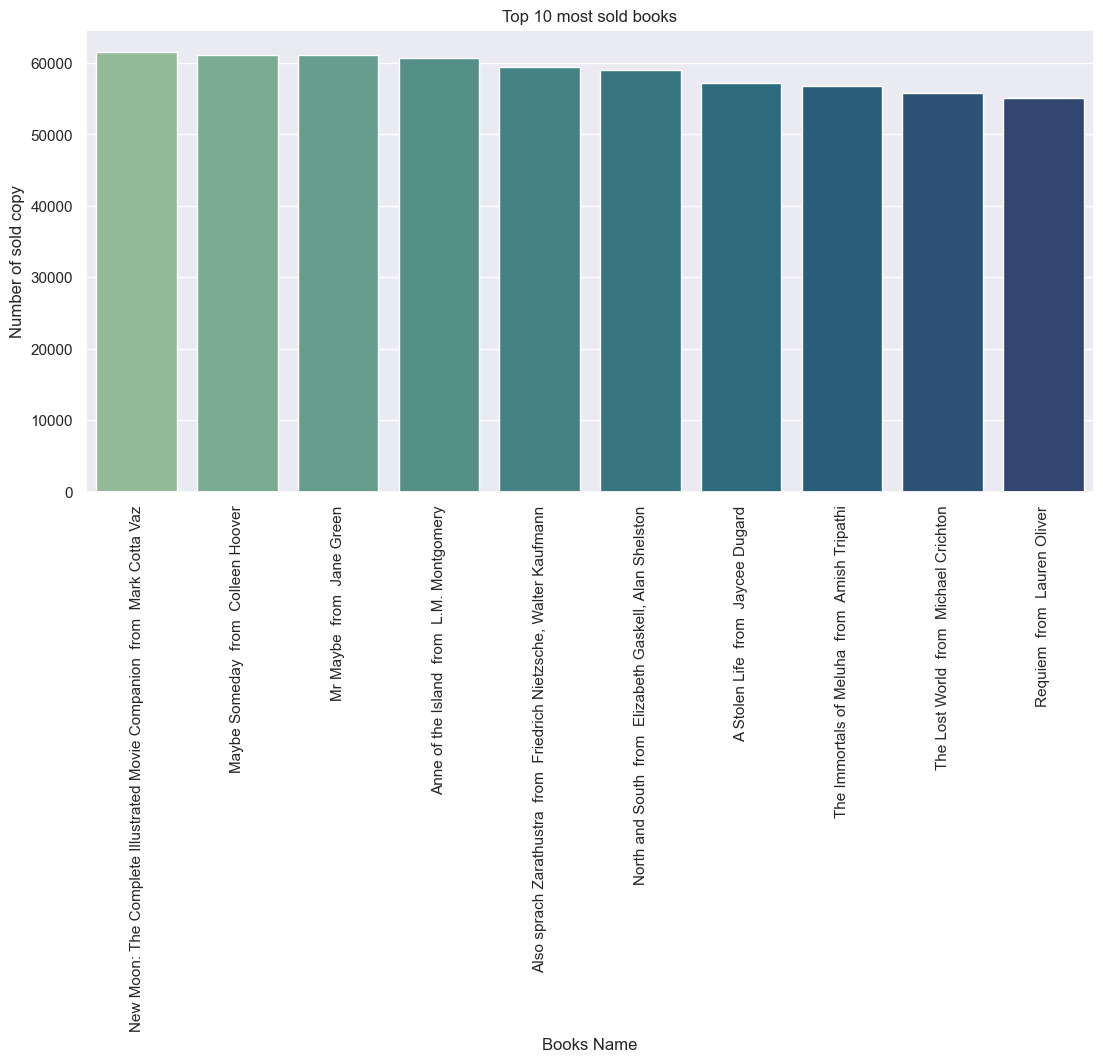

In [13]:
fig = (13,6)
fig, ax = plt.subplots(figsize=fig)
plt.xticks(rotation='vertical')
plt.gca().ticklabel_format(axis='y', style='plain')
ax = sns.barplot(mostsold1, x="AuthorBookName", y="units sold", estimator=sum, errorbar=None, palette="crest")

ax.set_title('Top 10 most sold books')
ax.set_xlabel('Books Name')
ax.set_ylabel('Number of sold copy');

##### The Author that sold the most book in general

In [14]:
authorsold = df.groupby('Author')['units sold'].sum().nlargest(10)
authorsold1 = authorsold.reset_index()

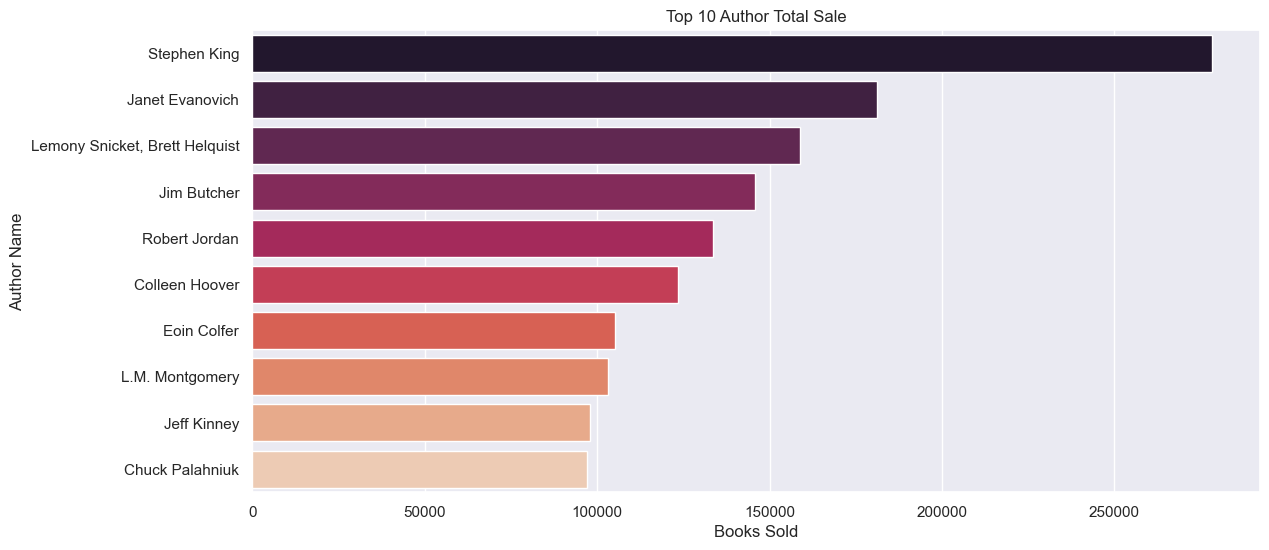

In [15]:

fig = (13,6)
fig, ax = plt.subplots(figsize=fig)
plt.xticks(rotation='horizontal')
plt.gca().ticklabel_format(axis='y', style='plain')
ax = sns.barplot(authorsold1, x="units sold", y="Author", estimator=sum, errorbar=None, palette = 'rocket')
ax.set_title('Top 10 Author Total Sale')
ax.set_xlabel('Books Sold')
ax.set_ylabel('Author Name');


##### Comparing top 10 books gross sales and publisher revenue

In [16]:
#I confirmed that gross sales is the total of units sold and sale price 
booksale = df.groupby('Book Name')['gross sales'].sum().nlargest(10).reset_index()
publisherrevenue = df.groupby('Book Name')['publisher revenue'].sum().nlargest(10).reset_index()
pbs = booksale.join(publisherrevenue.drop('Book Name',axis=1))


Text(0, 0.5, 'Total Revenue')

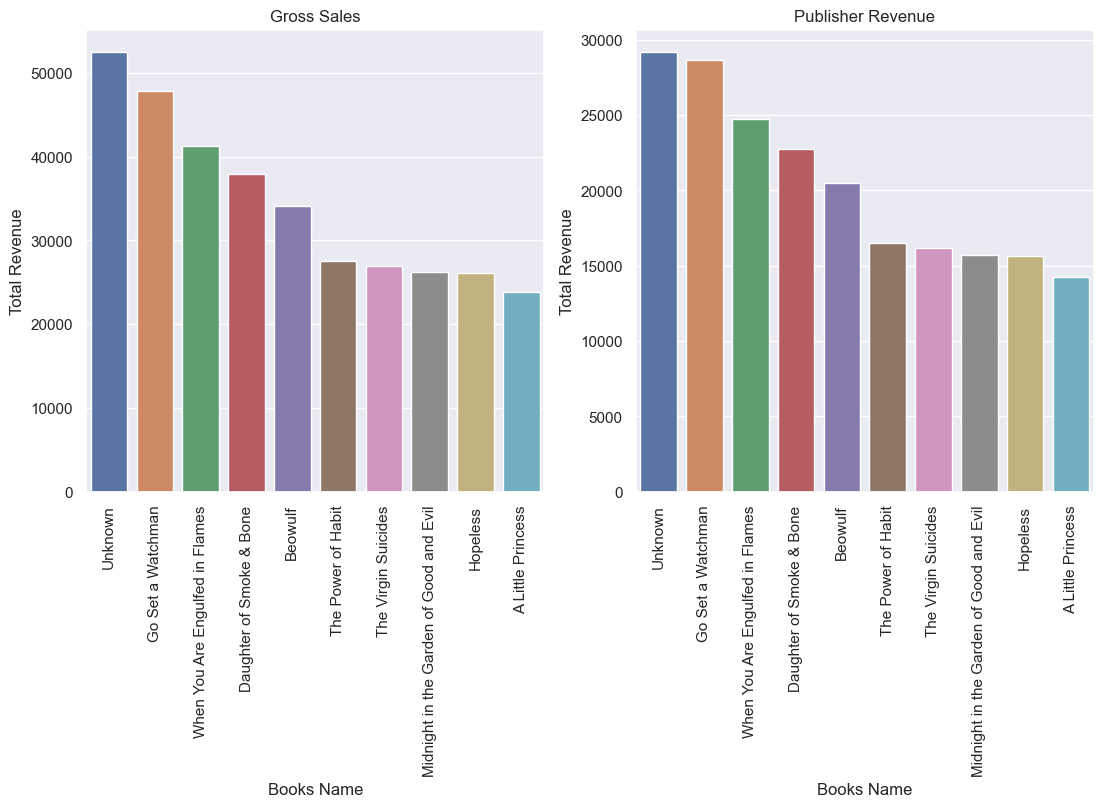

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6)) 
sns.barplot(booksale, x="Book Name", y="gross sales", estimator=sum, errorbar=None, ax=ax1)
ax1.tick_params(axis='x', rotation=90)
ax1.set_title('Gross Sales')
ax1.set_xlabel('Books Name')
ax1.set_ylabel('Total Revenue')
sns.barplot(publisherrevenue, x="Book Name", y="publisher revenue", estimator= sum, errorbar=None,ax=ax2)
ax2.tick_params(axis='x', rotation=90)
ax2.set_title('Publisher Revenue')
ax2.set_xlabel('Books Name')
ax2.set_ylabel('Total Revenue')


##### Top 10 books revenue for the Author

In [18]:
df['Author revenue'] = df['gross sales'] - df['publisher revenue']
authorrevenue = df.groupby('AuthorBookName')['Author revenue'].sum().nlargest(10).reset_index()

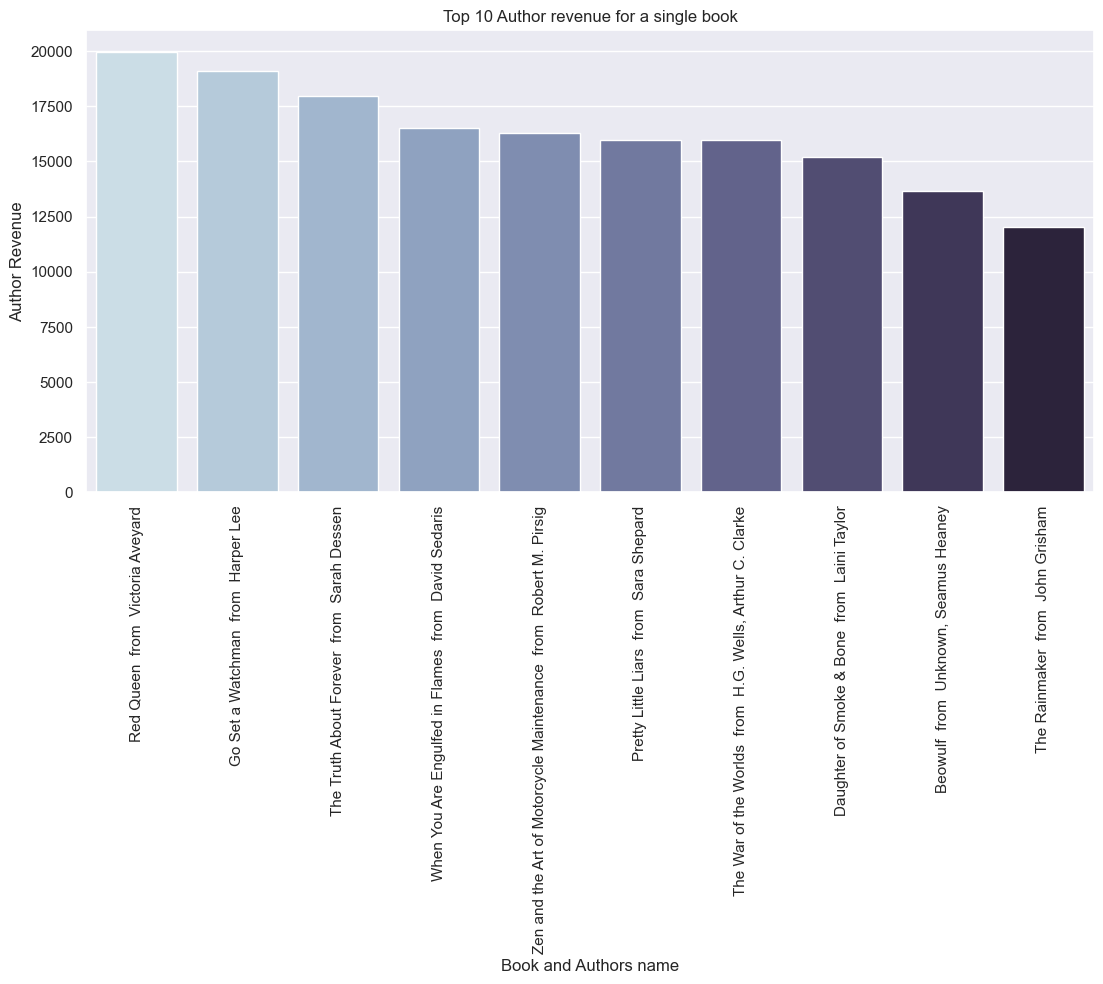

In [19]:
fig = (13,6)
fig, ax = plt.subplots(figsize=fig)
plt.xticks(rotation='vertical')
plt.gca().ticklabel_format(axis='y', style='plain')
ax = sns.barplot(authorrevenue, x="AuthorBookName", y="Author revenue", estimator=sum, errorbar=None, palette = "ch:s=.25,rot=-.25")
ax.set_title('Top 10 Author revenue for a single book')
ax.set_xlabel('Book and Authors name')
ax.set_ylabel('Author Revenue');

##### Top 10 rating books

In [20]:
avg_rating = df.groupby('Book Name')['Book_average_rating']
avg_rate = avg_rating.mean().nlargest(10).reset_index()

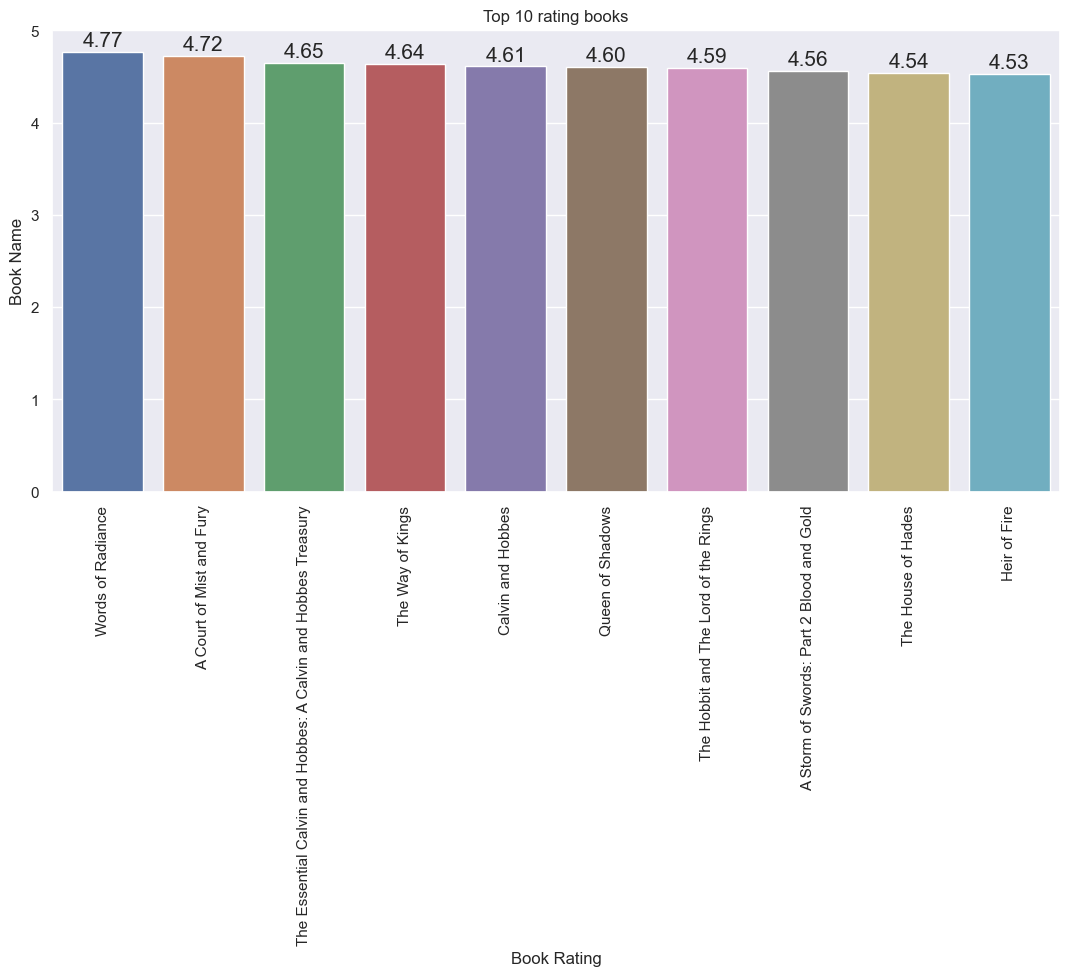

In [21]:
fig = (13,6)
fig, ax= plt.subplots(figsize=fig)
plt.xticks(rotation='vertical')
ax = sns.barplot(avg_rate, x= "Book Name", y= "Book_average_rating")
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
ax.set_title('Top 10 rating books')
ax.set_xlabel('Book Rating')
ax.set_ylabel('Book Name');

  Author_Rating  units sold
0     Excellent     4828717
1        Famous      349796
2  Intermediate     4963160
3        Novice      212696
  Author_Rating  Book_average_rating
0     Excellent             4.166713
1        Famous             4.439434
2  Intermediate             3.908448
3        Novice             3.369000
  Author_Rating  Book_ratings_count
0     Excellent            30011932
1        Famous             5162958
2  Intermediate            63716872
3        Novice             2661845


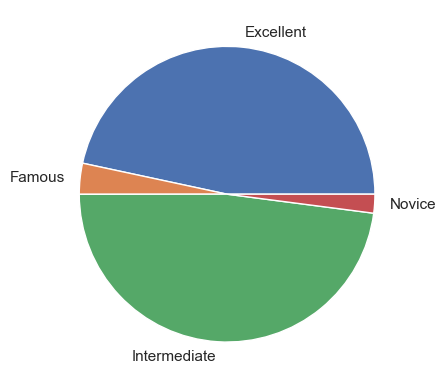

In [22]:
pds1 = df.groupby('Author_Rating')['units sold'].sum().reset_index()
pds2 = df.groupby('Author_Rating')['Book_average_rating'].mean().reset_index()
pds3 = df.groupby('Author_Rating')['Book_ratings_count'].sum().reset_index()
print(pds1)
print(pds2)
print(pds3)


plt.pie(pds1['units sold'], labels = pds1['Author_Rating'])
ax.set_title('Graphing the difference inbetween author rating and books rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Quantity of book');



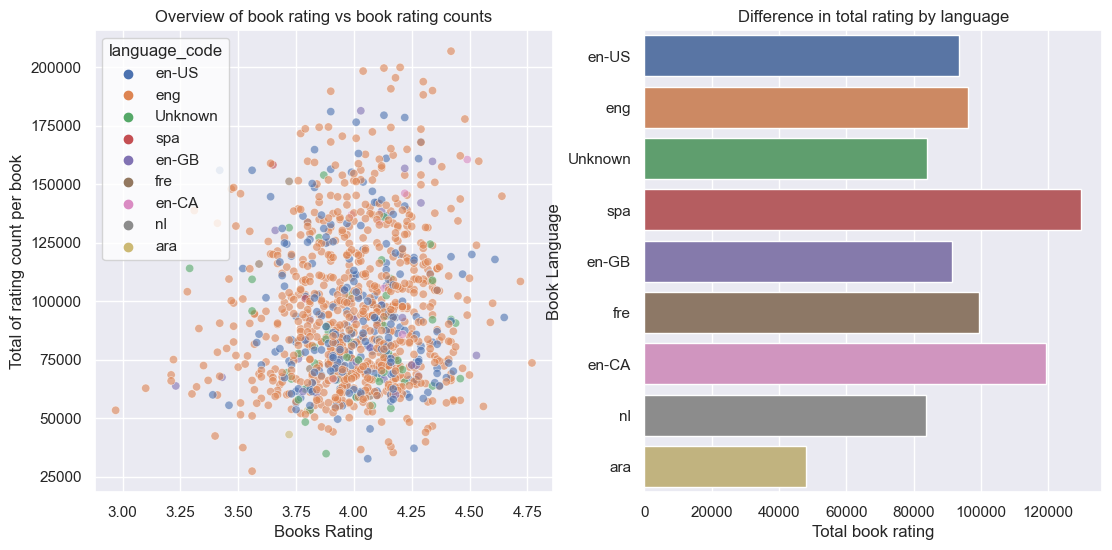

In [23]:
fig, axes = plt.subplots(1,2, figsize=(13,6))
sns.set_style("white")
sns.scatterplot(df, x="Book_average_rating", y="Book_ratings_count", hue="language_code", alpha=0.6, ax=axes[0])
axes[0].set_title('Overview of book rating vs book rating counts')
axes[0].set_xlabel('Books Rating');
axes[0].set_ylabel('Total of rating count per book')
sns.barplot(df, x="Book_ratings_count", y="language_code", errorbar=None,ax = axes[1])
axes[1].set_title('Difference in total rating by language')
axes[1].set_xlabel('Total book rating')
axes[1].set_ylabel('Book Language');


In [24]:
publish = df['Publisher '].str.startswith('Harper')  
df.loc[publish, 'Publisher '] = "HarperCollins" 

print(df['Publisher '].unique())

['HarperCollins' 'Amazon Digital Services,  Inc.' 'Hachette Book Group'
 'Penguin Group (USA) LLC' 'Random House LLC'
 'Simon and Schuster Digital Sales Inc' 'Macmillan']


In [94]:
#Trying to see the correlation inbetween a publisher, their average rating and their units sold

pub = df.groupby('Publisher ')[['Book_ratings_count', 'Book_average_rating', 'units sold']].agg({'Book_ratings_count': 'sum', 'Book_average_rating': 'mean', 'units sold' : 'sum'})

pub

,Book_ratings_count,Book_average_rating,units sold
Publisher,,,
"Amazon Digital Services, Inc.",56948157,4.002433,6074136
Hachette Book Group,6458705,3.961061,543821
HarperCollins,7384128,4.032152,649294
Macmillan,3818192,4.002439,334929
Penguin Group (USA) LLC,10418140,4.045833,934303
Random House LLC,11371175,3.988750,1315958
Simon and Schuster Digital Sales Inc,5155110,4.042143,501928


We can understand the book average rating and book rating counts right now are actually the publisher rating counts and average rating

In [95]:
pub['PublisherRatingCount'] = pub['Book_ratings_count']
pub['PublisherAverageRating'] = pub['Book_average_rating']

In [96]:
pub.drop('Book_ratings_count', axis=1, inplace=True, errors = 'ignore')
pub.drop('Book_average_rating', axis=1, inplace=True, errors = 'ignore')

percentages = pub['PublisherRatingCount'] / pub['PublisherRatingCount'].sum() * 100
percentages1 = pub['units sold'] / pub['units sold'].sum() * 100


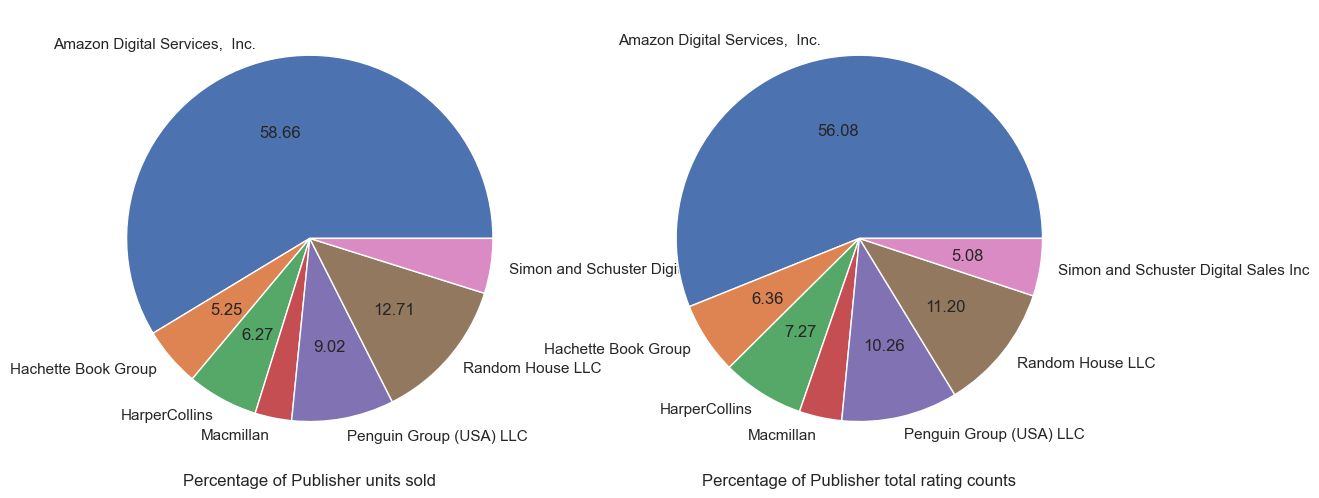

In [97]:
fig, axes = plt.subplots(1,2 , figsize=(13,6))


def get_new_labels(sizes, labels, percentage):
    new_labels = [label for size, label in zip(sizes, labels)]
    return new_labels

sizes = pub['units sold']
labels = pub.index
axes[0].pie(pub["units sold"], autopct=my_autopct, labels=get_new_labels(sizes, labels,percentage))
axes[1].pie(pub["PublisherRatingCount"], autopct=my_autopct, labels=get_new_labels(sizes, labels,percentage))
axes[0].set_xlabel("Percentage of Publisher units sold")
axes[1].set_xlabel("Percentage of Publisher total rating counts");

#I'd like futher explanation for this since I can't make it work

I'd like to see the tendency of sales rank with the amount of ratings count

Text(0, 0.5, 'Sales Rank')

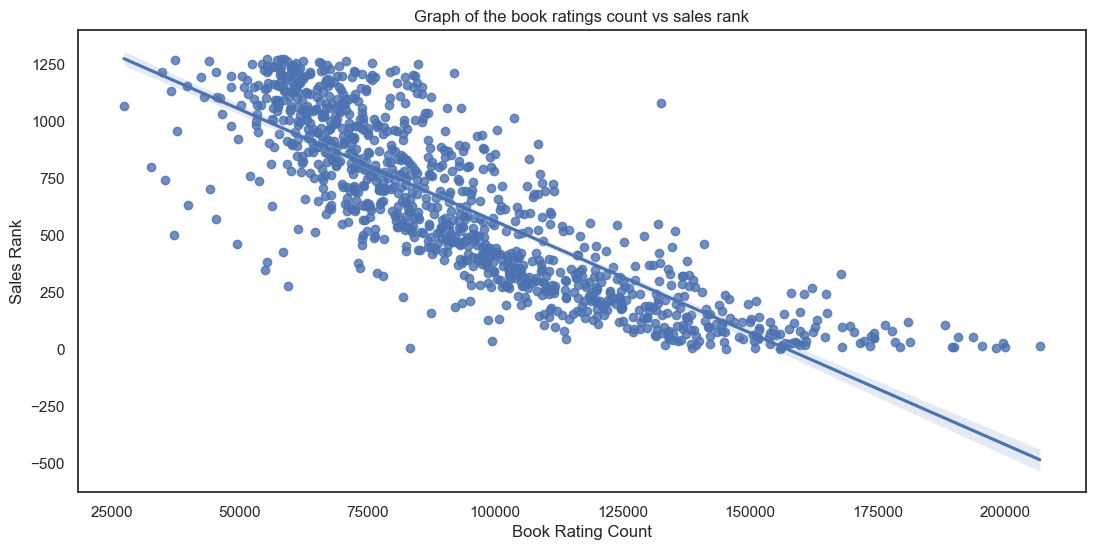

In [110]:
fig, ax = plt.subplots(figsize=(13,6))

sns.regplot(df, x='Book_ratings_count', y='sales rank', ax= ax)
ax.set_title('Graph of the book ratings count vs sales rank')
ax.set_xlabel('Book Rating Count')
ax.set_ylabel('Sales Rank')

We could see an outlier over a 1000 Sales rank and inbetween 125000 and 150000 counts

Overall we can clearly see the more book rating count, the higher the sales rank, what if we try it with units sold instead?

Text(0, 0.5, 'Sales Rank')

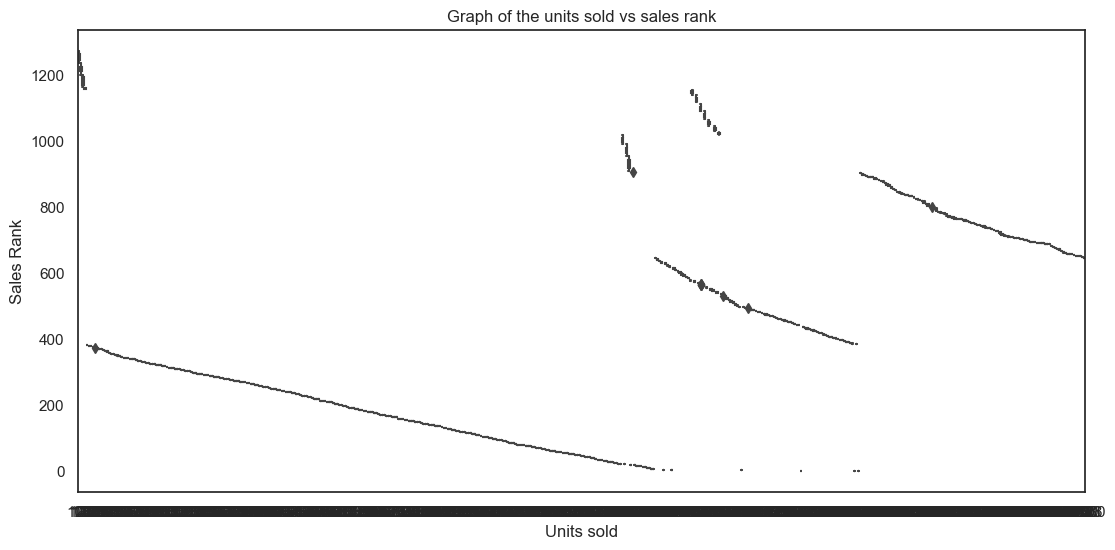

In [113]:
fig, ax = plt.subplots(figsize=(13,6))

sns.boxplot(df, x='units sold', y='sales rank', ax= ax)
ax.set_title('Graph of the units sold vs sales rank')
ax.set_xlabel('Units sold')
ax.set_ylabel('Sales Rank')

C:\Users\Jordan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jordan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Sales Rank')

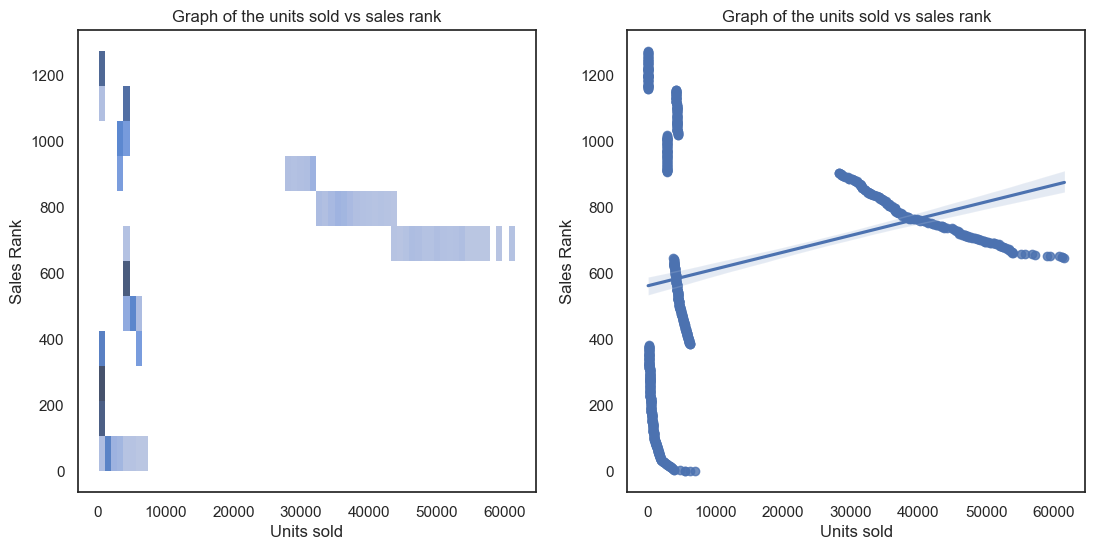

In [114]:
fig, ax = plt.subplots(1,2 ,figsize=(13,6))

sns.histplot(df, x='units sold', y='sales rank', ax= ax[0])
ax[0].set_title('Graph of the units sold vs sales rank')
ax[0].set_xlabel('Units sold')
ax[0].set_ylabel('Sales Rank')
sns.regplot(df, x='units sold', y='sales rank', ax= ax[1])
ax[1].set_title('Graph of the units sold vs sales rank')
ax[1].set_xlabel('Units sold')
ax[1].set_ylabel('Sales Rank')

The histogram plot speak a bit more to us, we can denotate a few information.

1. The best sales rank usually sell less
2. Meanwhile the moment you sell over 30000 books you end up inbetween 600 and a 1000 rank
3. When you sell over 45000 books you belong inbetween 600 and 800.


so overall, unless you sell more than 30000 books you ranking is pretty much irrelevent